In [23]:
import pandas as pd

# Importing Data

In [24]:
df       = pd.read_csv('../example/accuracy_results.txt', sep=' ', header=0)
best     = 52.53

In [25]:
df.head()

,id,acc
0,0,50.66
1,70,49.08
2,620,48.89
3,580,48.82
4,312,48.56


# Generate Data for Analysis

In [26]:
df = df.sort_values(by='acc')


# Charts

In [27]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have a DataFrame df with columns 'id', 'acc' and 'diff'

# Adding the 'acc + diff' column
df['acc_diff'] = best
df['best'] = best

# Creating a sample count index
df['sample_count'] = range(1, len(df) + 1)

# Creating the line chart
fig = go.Figure()

# Adding the horizontal straight line at the acc mean
mean_acc = df['acc'].mean()
fig.add_shape(
    type="line",
    x0=df['sample_count'].min(),
    y0=mean_acc,
    x1=df['sample_count'].max(),
    y1=mean_acc,
    line=dict(color="red", width=2, dash="dash"),
    name="Mean Accuracy"
)

# Adding the line that relates acc with sample_count
fig.add_trace(go.Scatter(
    x=df['sample_count'],
    y=df['acc'],
    mode='lines',
    name='Accuracy',
    hovertemplate='ID: %{customdata[0]}<br>Accuracy: %{y}<br>Att: %{customdata[2]}<extra></extra>',
    customdata=df[['id', 'acc']].values
))

# Adding the green line for acc + diff
fig.add_trace(go.Scatter(
    x=df['sample_count'],
    y=df['acc_diff'],
    mode='lines',
    name='Best Accuracy',
    line=dict(color='green'),
    hovertemplate='ID: %{customdata[0]}<br>Best Accuracy: %{y}<extra></extra>',
    customdata=df[['id','acc']].values
))

# Adjusting the chart layout
fig.update_layout(
    title='Line Chart of Accuracy, Best Accuracy and Mean Accuracy',
    xaxis_title='Sample Count',
    yaxis_title='Value',
    width=1000,  # Chart width
    height=600,  # Chart height
    xaxis=dict(autorange='reversed'),  # Reverse X axis
    margin=dict(l=50, r=50, t=50, b=50),  # Margins
    hovermode='closest',  # Hover interaction mode
    xaxis_rangeslider_visible=True,  # Add zoom control
)

fig.show()


In [28]:
import plotly.io as pio

# Save the chart as an HTML file
pio.write_html(fig, file='interactive_chart.html', auto_open=True)


Abrindo em uma sessão existente do navegador.


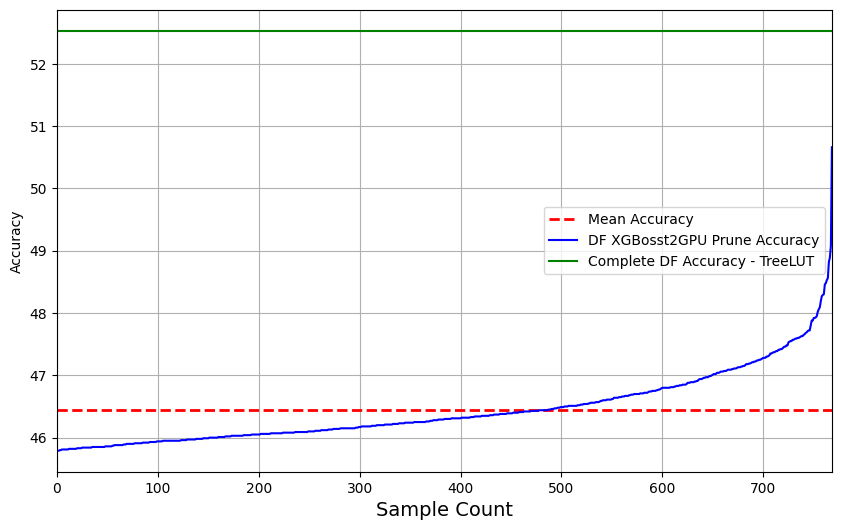

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have a DataFrame df with columns 'id', 'acc' and 'diff'

# Adding the 'acc + diff' column
df['acc_diff'] = best

# Creating a sample count index
df['sample_count'] = range(1, len(df) + 1)

# Calculating the mean of acc
mean_acc = df['acc'].mean()

# Creating the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Adding the horizontal straight line at the acc mean
ax.axhline(y=mean_acc, color='red', linestyle='--', linewidth=2, label='Mean Accuracy')

# Adding the line that relates acc with sample_count
ax.plot(df['sample_count'], df['acc'], label='DF XGBosst2GPU Prune Accuracy', color='blue')

# Adding the green line for acc + diff
ax.plot(df['sample_count'], df['acc_diff'], label='Complete DF Accuracy - TreeLUT', color='green')

# Adjusting the chart layout
ax.set_xlabel('Sample Count', fontsize=14)
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)

# Adjusting the x-axis limits to start at 0 and end at the total number of samples
ax.set_xlim([0, len(df)])

plt.savefig('chart_10k.pdf')
plt.savefig('chart_10k.svg')
plt.savefig('chart_10k.png')

plt.show()
